In [1]:
import numpy as np    #Numerical computing library for Python.
import pandas as pd   #Library for data manipulation and analysis.
import plotly.express as px    #Library for creating interactive visualizations with Plotly.
import matplotlib.pyplot as plt   #Library for creating static visualizations.
import seaborn as sns     #Library for creating statistical graphics.

# These might be helpful:
import iso3166 as iso
from datetime import datetime, timedelta

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
# %pip install --upgrade plotly

### Import Statements

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install iso3166

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install country_converter --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Notebook Presentation

In [8]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [9]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* shape of `df_data`? 
* rows and columns
* column names
* any NaN values or duplicates

In [10]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [11]:
print("The shape of the data is:",df_data.shape) # Gives shape of data

The shape of the data is: (4324, 9)


In [12]:
count_row = df_data.shape[0]  # Gives number of rows
count_col = df_data.shape[1]  # Gives number of columns
print("There are",count_row, "rows and",count_col, "columns in this data.")

There are 4324 rows and 9 columns in this data.


In [13]:
print("The column names are as follows:",df_data.columns)

The column names are as follows: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [14]:
df_data.isna()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


## Data Cleaning - Checking for Missing Values and Duplicates

removing columns containing junk data. 

In [15]:
clean_df = df_data.dropna()

In [16]:
df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [17]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [18]:
df_data[df_data["Price"].notna()]["Price"].str.replace(',', '').astype(float).describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

# Number of Launches per Company

Creating a chart that shows the number of space mission launches by organisation.

<Axes: xlabel='Organisation'>

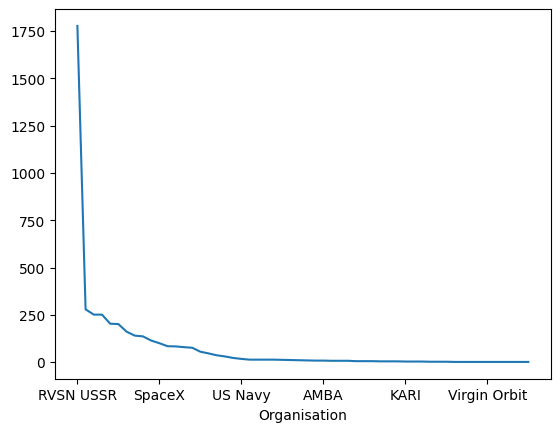

In [19]:
df_data["Organisation"].value_counts().plot()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [20]:
df_data["Rocket_Status"].value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

<Axes: ylabel='Rocket_Status'>

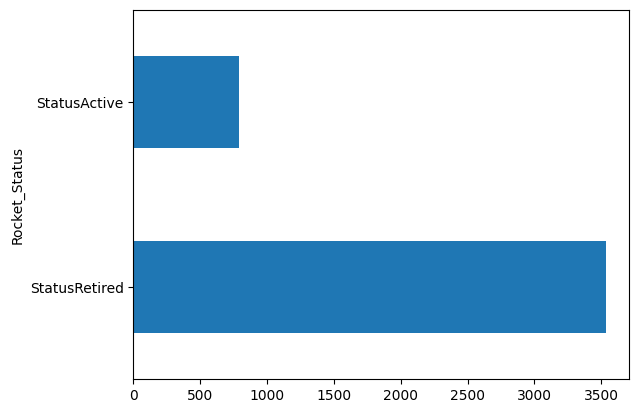

In [21]:
df_data["Rocket_Status"].value_counts().plot(kind="barh")

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [22]:
df_data["Mission_Status"].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [23]:
df_data.groupby("Mission_Status").agg({"Mission_Status":pd.Series.count})

,Mission_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3879


# How Expensive are the Launches? 

Creating a histogram and visualise the distribution. The price column is given in USD millions (missing values too). 

In [24]:
px.histogram(df_data.sort_values(by=["Organisation", "Price"], ascending=[True, True]), x="Price",nbins=10) 

# Using a Choropleth Map to Show the Number of Launches by Country

* Created a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experimented with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* We need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

We'll need to use a 3 letter country code for each country.Might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


used the iso3166 package to convert the country names to Alpha3 format.

In [25]:
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

countries = {country.name: key for key, country in iso.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

world_map = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,RUS
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [26]:
for c in countries: 
    print(c)

Afghanistan
Åland Islands
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia, Plurinational State of
Bonaire, Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Bouvet Island
Brazil
British Indian Ocean Territory
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cabo Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Christmas Island
Cocos (Keeling) Islands
Colombia
Comoros
Congo
Congo, Democratic Republic of the
Cook Islands
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Curaçao
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Falkland Islands (Malvinas)
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
French Southern Territories
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenl

# Using a Choropleth Map to Show the Number of Failures by Country


In [27]:
statuses = df_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()

world_map = px.choropleth(failures, locations=failures.index, color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True) 
world_map.show()


# Creating a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [28]:
sunburst = df_data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values("size", ascending=False)
sunburst.head()
px.sunburst(sunburst, path=["Country", "Organisation", "Mission_Status"], values="size", title="Missions By Country")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [29]:
money_spent = df_data[df_data["Price"].notna()]

money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)

total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()
total_money_spent.sort_values(by="Price", ascending=False)
total_money_spent.head()


C:\Users\siddh\AppData\Local\Temp\ipykernel_10636\635511458.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [30]:
organisation_expense = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_expense.sort_values("Price", ascending=False)
organisation_expense.head()

,Organisation,Price
0,Arianespace,170.26
1,Boeing,177.29
2,CASC,40.13
3,EER,20.00
4,ESA,37.00


# Chart the Number of Launches per Year

In [31]:
# # Converted the date to the datetime object, then extracted the year from the datetime object.
# df_data['date'] = pd.to_datetime(df_data['Date'])
# df_data['year'] = df_data['date'].apply(lambda datetime: datetime.year)
# # df_data['year'].head()

# # Counted the number of times the same year is mentioned.
# ds = df_data['year'].value_counts().reset_index()
# ds.columns = [
#     'year', 
#     'count'
# ]
# # Passing the year and the count to the bar graph.
# fig = px.bar(
#     ds, 
#     x='year', 
#     y="count", 
#     orientation='v', 
#     title='Missions number by year' 
# #     width=800
# )
# fig.show()



import pandas as pd
import plotly.express as px

# Assuming df_data is the DataFrame with a 'Date' column
df_data['date'] = pd.to_datetime(df_data['Date'], errors='coerce')

# Extract the time component and convert it to total seconds
df_data['time'] = df_data['date'].dt.time
df_data['time_seconds'] = df_data['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second if pd.notna(x) else pd.NaT)

# Calculate the median time in seconds (ignoring NaT values)
median_time_seconds = df_data['time_seconds'].median()

# Convert the median time back to datetime.time
median_time = pd.to_datetime(median_time_seconds, unit='s').time()

# Fill missing times with the median time
df_data['time'].fillna(median_time, inplace=True)

# Combine date and time to get a complete datetime object
df_data['complete_datetime'] = pd.to_datetime(df_data['date'].dt.strftime('%Y-%m-%d') + ' ' + df_data['time'].astype(str))

# Continue with the rest of your code
df_data['year'] = df_data['complete_datetime'].dt.year

# Count the number of times the same year is mentioned.
ds = df_data['year'].value_counts().reset_index()
ds.columns = ['year', 'count']

# Passing the year and the count to the bar graph.
fig = px.bar(ds, x='year', y='count', orientation='v', title='Missions number by year')
fig.show()




# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time?

In [32]:
# Converted the date to the datetime object, then extracted the month from the datetime object.
# df_data['date'] = pd.to_datetime(df_data['Date'])
# df_data['month'] = df_data['date'].apply(lambda datetime: datetime.month)
# # df_data['month'].head()

# # Counted the number of times the same month is mentioned.
# ds = df_data['month'].value_counts().reset_index()
# ds.columns = [
#     'month', 
#     'count'
# ]
# # Passing the year and the count to the bar graph.
# fig = px.bar(
#     ds, 
#     x='month', 
#     y="count", 
#     orientation='v', 
#     title='Missions number by month' 
# #     width=800
# )
# fig.show()

import pandas as pd
import plotly.express as px

# Assuming df_data is the DataFrame with a 'Date' column
df_data['date'] = pd.to_datetime(df_data['Date'], errors='coerce')

# Extract the month component
df_data['month'] = df_data['date'].dt.month

# Count the number of times the same month is mentioned.
ds = df_data['month'].value_counts().reset_index()
ds.columns = ['month', 'count']

# Passing the month and the count to the bar graph.
fig = px.bar(ds, x='month', y='count', orientation='v', title='Missions number by month')
fig.show()


# December has the most launches of all time.

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [33]:
# Using max to find the most launches per month
most_launches = ds['count'].max()
print("Most launches in a month =", most_launches)

# print the month associated with the max value
ds.sort_values(by="count", ascending=False)
ds.max()

Most launches in a month = 430


month    12.00
count   430.00
dtype: float64

In [34]:
#Using min to find the least launches per month
least_launches = ds['count'].min()
print("Least launches in a month =", least_launches)
ds.min()

Least launches in a month = 265


month     1.00
count   265.00
dtype: float64

# How has the Launch Price varied Over Time? 

Creating a line chart that shows the average price of rocket launches over time. 

C:\Users\siddh\AppData\Local\Temp\ipykernel_10636\470031650.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



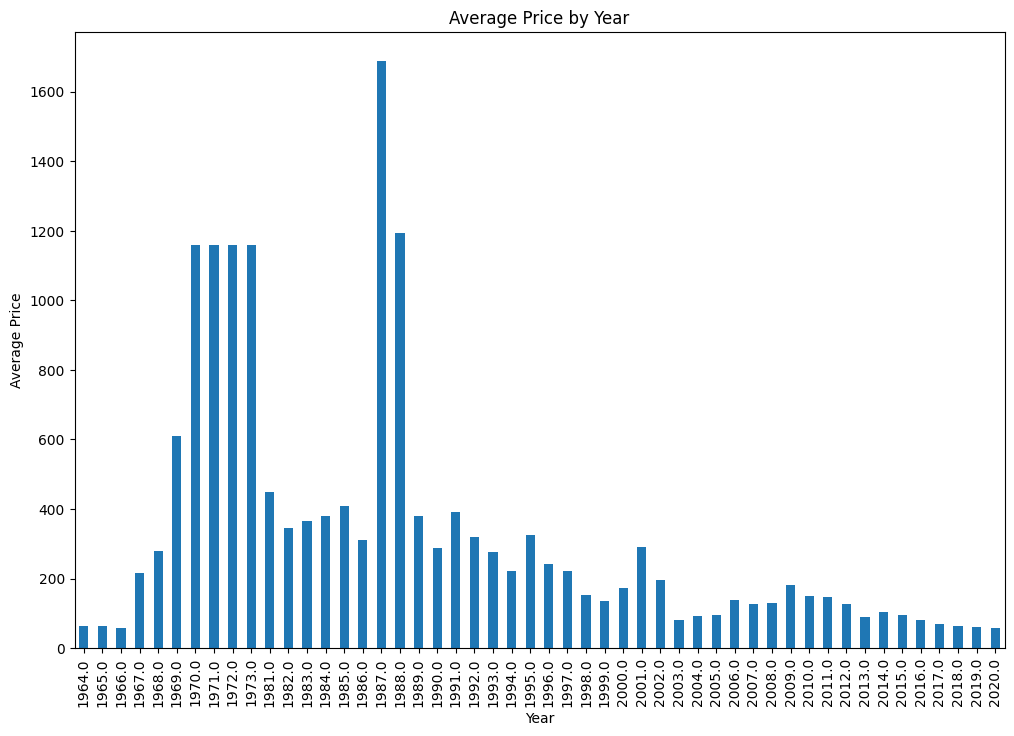

In [35]:
# avg_price = df_data[df_data["Price"].notna()]
# pd.options.mode.chained_assignment = None
# avg_price["Price"] = avg_price["Price"].str.replace(',', '').astype(float)

# avg_price.groupby("year").mean().plot(figsize=(12, 8))


import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_data is your DataFrame with a 'Price' column
avg_price = df_data[df_data["Price"].notna()]

# Clean the "Price" column by removing commas and other non-numeric characters
avg_price["Price"] = avg_price["Price"].replace('[^\d.]', '', regex=True).astype(float)

# Group by year and calculate the mean of the "Price" column
avg_price_by_year = avg_price.groupby("year")["Price"].mean()

# Plot the average price by year
avg_price_by_year.plot(figsize=(12, 8), kind='bar', title='Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()


# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [36]:
# Grab data from Organisations and Locations columns
# Sort through data to find the top 10 Organisations 
# top_10=pd.DataFrame(columns=df_data.columns)
# for val in df_data.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index:
#   print(val)
#   org=df_data[df_data.Organisation==val]
#   top_10=top_10.append(org,ignore_index=False, verify_integrity=False, sort=None)
# top_10

# df_data[df_data.Organisation=="CASC"]

# top_10.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index

# # print(top_10.shape)

# # Create a chart to display the data
# px.histogram(top_10.sort_values(by=["Organisation", "Date"], ascending=[True, False]), x="Organisation",nbins=10) 


# Assuming df_data is the DataFrame with 'Organisation' and 'Date' columns
top_10 = pd.DataFrame(columns=df_data.columns)

# Get the top 10 organisations based on the count of missions
top_organisations = df_data['Organisation'].value_counts().head(10).index

# Iterate through top organisations and append their data to top_10
for val in top_organisations:
    org = df_data[df_data['Organisation'] == val]
    top_10 = pd.concat([top_10, org], ignore_index=True)

# Display the result
print(top_10)

# Create a histogram to display the data
fig = px.histogram(top_10.sort_values(by=["Organisation", "Date"], ascending=[True, False]), x="Organisation", nbins=10)
fig.show()

         Organisation                                  Location  \
0           RVSN USSR    Site 41/1, Plesetsk Cosmodrome, Russia   
1           RVSN USSR    Site 43/3, Plesetsk Cosmodrome, Russia   
2           RVSN USSR    Site 43/3, Plesetsk Cosmodrome, Russia   
3           RVSN USSR    Site 32/1, Plesetsk Cosmodrome, Russia   
4           RVSN USSR    Site 43/3, Plesetsk Cosmodrome, Russia   
...               ...                                       ...   
3508  Martin Marietta  SLC-41, Cape Canaveral AFS, Florida, USA   
3509  Martin Marietta  SLC-41, Cape Canaveral AFS, Florida, USA   
3510  Martin Marietta  SLC-41, Cape Canaveral AFS, Florida, USA   
3511  Martin Marietta  SLC-40, Cape Canaveral AFS, Florida, USA   
3512  Martin Marietta  SLC-40, Cape Canaveral AFS, Florida, USA   

                            Date  \
0     Wed Aug 12, 1998 12:53 UTC   
1     Thu Aug 29, 1996 05:22 UTC   
2     Wed Aug 02, 1995 23:59 UTC   
3     Mon Jul 13, 1992 17:41 UTC   
4     Wed Jul 0

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [37]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
# Or_df.head()

In [38]:
# Sort years
cold_war_years = Or_df.sort_values("year")

# Grab years from start of dataset (1964) til 1991
cold_war_years[(cold_war_years.year <= 1991)]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,time,time_seconds,complete_datetime,year,month
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,RUS,1957-10-04 19:28:00+00:00,19:28:00,70080,1957-10-04 19:28:00,"1,957.00",10.00
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS,1957-11-03 02:30:00+00:00,02:30:00,9000,1957-11-03 02:30:00,"1,957.00",11.00
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957-12-06 16:44:00+00:00,16:44:00,60240,1957-12-06 16:44:00,"1,957.00",12.00
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958-02-01 03:48:00+00:00,03:48:00,13680,1958-02-01 03:48:00,"1,958.00",2.00
4293,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA","Thu Dec 18, 1958 23:02 UTC",SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,1958-12-18 23:02:00+00:00,23:02:00,82920,1958-12-18 23:02:00,"1,958.00",12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Tue May 14, 1991 15:52 UTC",Atlas-E/F Star-37S-ISS | NOAA-D,StatusRetired,NaN,Success,USA,1991-05-14 15:52:00+00:00,15:52:00,57120,1991-05-14 15:52:00,"1,991.00",5.00
1753,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Thu May 16, 1991 21:40 UTC",Tsyklon-3 | Cosmos 2143 to 2148,StatusRetired,NaN,Success,RUS,1991-05-16 21:40:00+00:00,21:40:00,78000,1991-05-16 21:40:00,"1,991.00",5.00
1752,Boeing,"SLC-17B, Cape Canaveral AFS, Florida, USA","Wed May 29, 1991 22:55 UTC",Delta II 7925 | Aurora 2,StatusRetired,NaN,Success,USA,1991-05-29 22:55:00+00:00,22:55:00,82500,1991-05-29 22:55:00,"1,991.00",5.00
1760,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Fri Apr 05, 1991 14:22 UTC",Space Shuttle Atlantis | STS-37,StatusRetired,450.0,Success,USA,1991-04-05 14:22:00+00:00,14:22:00,51720,1991-04-05 14:22:00,"1,991.00",4.00


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [39]:
# Grab the data for USA and for Russian Federation (aka USSR)
Or_df = cold_war_years[(cold_war_years['Country']=='USA') | (cold_war_years['Country']=='RUS')]
Or_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,time,time_seconds,complete_datetime,year,month
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,RUS,1957-10-04 19:28:00+00:00,19:28:00,70080,1957-10-04 19:28:00,"1,957.00",10.00
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS,1957-11-03 02:30:00+00:00,02:30:00,9000,1957-11-03 02:30:00,"1,957.00",11.00
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957-12-06 16:44:00+00:00,16:44:00,60240,1957-12-06 16:44:00,"1,957.00",12.00
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958-02-01 03:48:00+00:00,03:48:00,13680,1958-02-01 03:48:00,"1,958.00",2.00
4293,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA","Thu Dec 18, 1958 23:02 UTC",SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,1958-12-18 23:02:00+00:00,23:02:00,82920,1958-12-18 23:02:00,"1,958.00",12.00


In [40]:
# Do not need to count the data - since the pie chart will collect the data per country. However, getting the count will help us to know if the data pulled into the pie chart is accurate.
launches = Or_df["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

,Country,counts
0,RUS,2099
1,USA,1351


([<matplotlib.patches.Wedge at 0x1fb42dbb490>,
 [Text(-0.36742349695818666, 1.0368220550716587, 'RUS'),
  Text(0.3674233998838983, -1.0368220894723246, 'USA')])

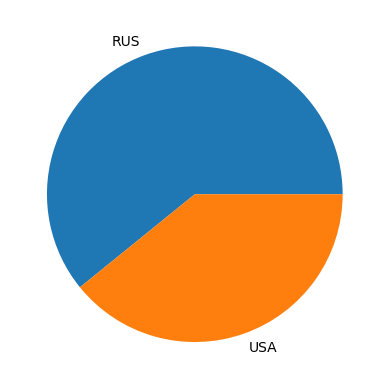

In [41]:
# https://stackoverflow.com/questions/65806703/python-pie-chart-using-csv
# Plot chart using Country and Mission_Status. When ploting the Mission_Status data will be counted and will return the total number of launches by country
colors = ["#1f77b4", "#ff7f0e"]
grouping = Or_df.groupby("Country").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['Country']

plt.pie(sizes, labels = labels, colors = colors)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Axes: xlabel='year'>

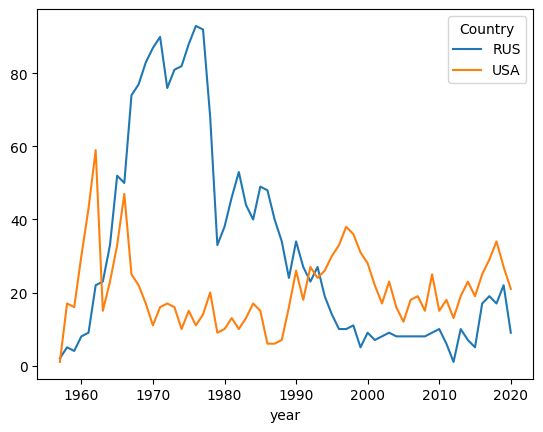

In [42]:
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
# .size() can be used rather than counts()
Or_df.groupby(["year", "Country"]).size().unstack().plot()


## Chart the Total Number of Mission Failures Year on Year.

In [43]:
Or_df = df_data[df_data['Mission_Status'].str.contains("Failure")]
Or_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,time,time_seconds,complete_datetime,year,month
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure,CHN,2020-07-10 04:17:00+00:00,04:17:00,15420,2020-07-10 04:17:00,"2,020.00",7.00
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,NZL,2020-07-04 21:19:00+00:00,21:19:00,76740,2020-07-04 21:19:00,"2,020.00",7.00
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.0,Failure,USA,2020-05-25 19:50:00+00:00,19:50:00,71400,2020-05-25 19:50:00,"2,020.00",5.00
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN,2020-04-09 11:46:00+00:00,11:46:00,42360,2020-04-09 11:46:00,"2,020.00",4.00
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure,CHN,2020-03-16 13:34:00+00:00,13:34:00,48840,2020-03-16 13:34:00,"2,020.00",3.00


In [44]:
# How to grab the failures by year from above to use as data points for the chart? Rather than mission status I want failures 
# yearly_failures = px.data.tips()
# fig = px.sunburst(Or_df, path=["year", "Mission_Status"])
# fig.show()


import pandas as pd
import plotly.express as px

# Assuming Or_df is the DataFrame with 'year' and 'Mission_Status' columns
# Filter out rows with missing or unexpected values in 'year'
Or_df_cleaned = Or_df.dropna(subset=['year'])

# Filter out rows with 'Mission_Status' other than 'Failure'
Or_df_failures = Or_df_cleaned[Or_df_cleaned['Mission_Status'] == 'Failure']

# Create a sunburst chart with the cleaned data
fig = px.sunburst(Or_df_failures, path=["year", "Mission_Status"])
fig.show()


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

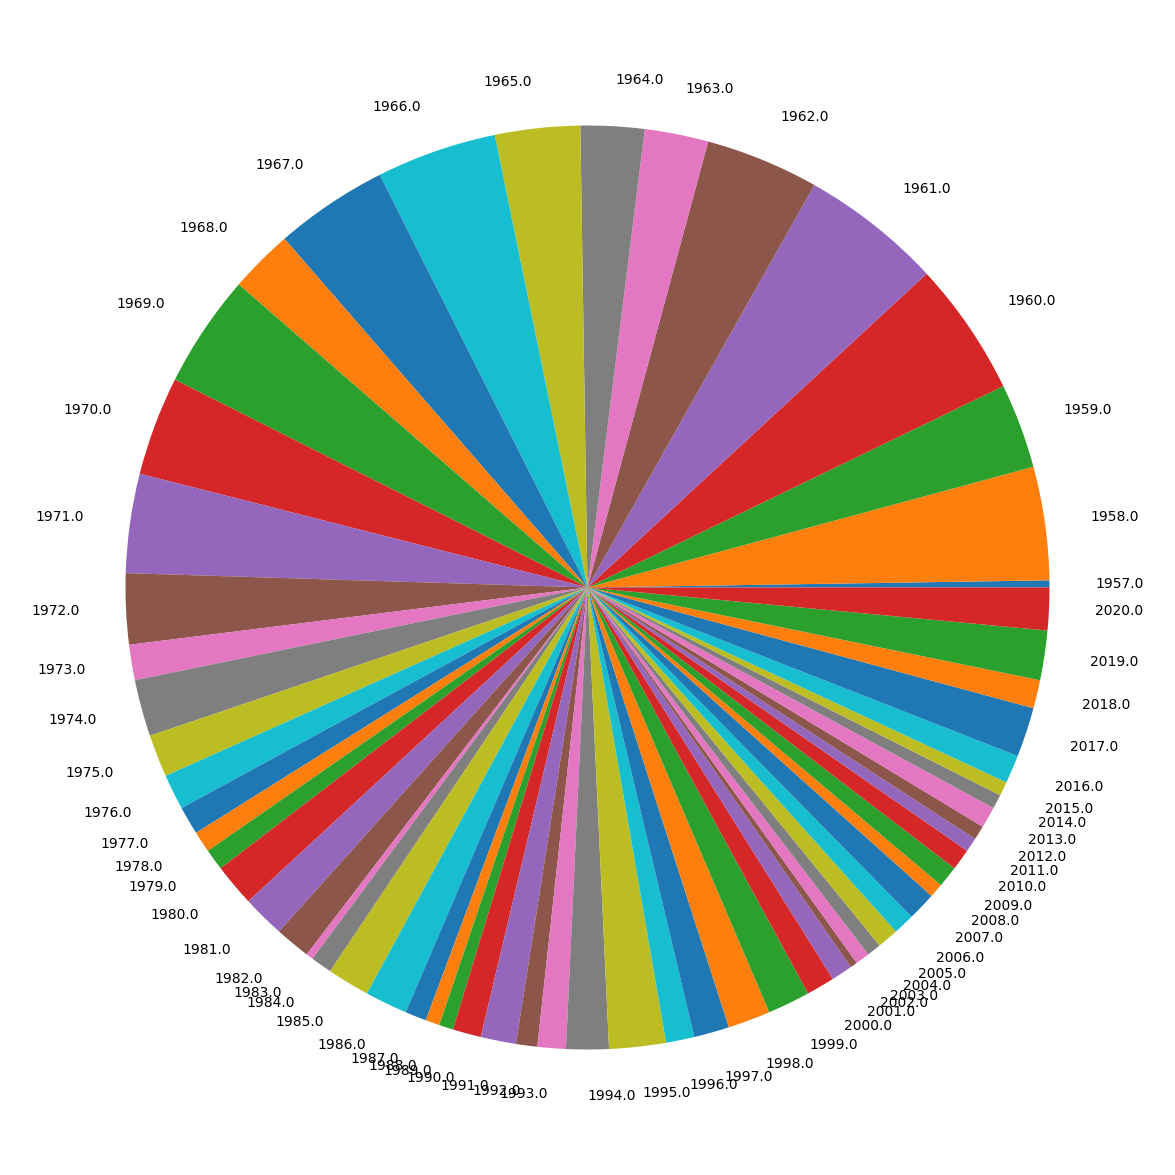

In [45]:
grouping = Or_df.groupby("year").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['year']

plt.pie(sizes, labels = labels)
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.show()

# For Every Year which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [46]:
country_launches = df_data.groupby("year")["Country"].value_counts().rename_axis(["year", "Country"]).reset_index(name='counts')

# group by year, then by country, then find max count
country_launches.loc[country_launches.groupby("year")["counts"].idxmax()]
country_launches.head()

,year,Country,counts
0,"1,957.00",RUS,2
1,"1,957.00",USA,1
2,"1,958.00",USA,17
3,"1,958.00",RUS,5
4,"1,959.00",USA,16


# A Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [47]:
org_launches = df_data.groupby("year")["Organisation"].value_counts().rename_axis(["year", "Organisation"]).reset_index(name='counts')

# group by year, then by country, then find max count
org_launches.loc[org_launches.groupby("year")["counts"].idxmax()]
org_launches

,year,Organisation,counts
0,"1,957.00",RVSN USSR,2
1,"1,957.00",US Navy,1
2,"1,958.00",AMBA,7
3,"1,958.00",US Navy,6
4,"1,958.00",RVSN USSR,5
...,...,...,...
627,"2,020.00",IAI,1
628,"2,020.00",IRGC,1
629,"2,020.00",ISA,1
630,"2,020.00",JAXA,1


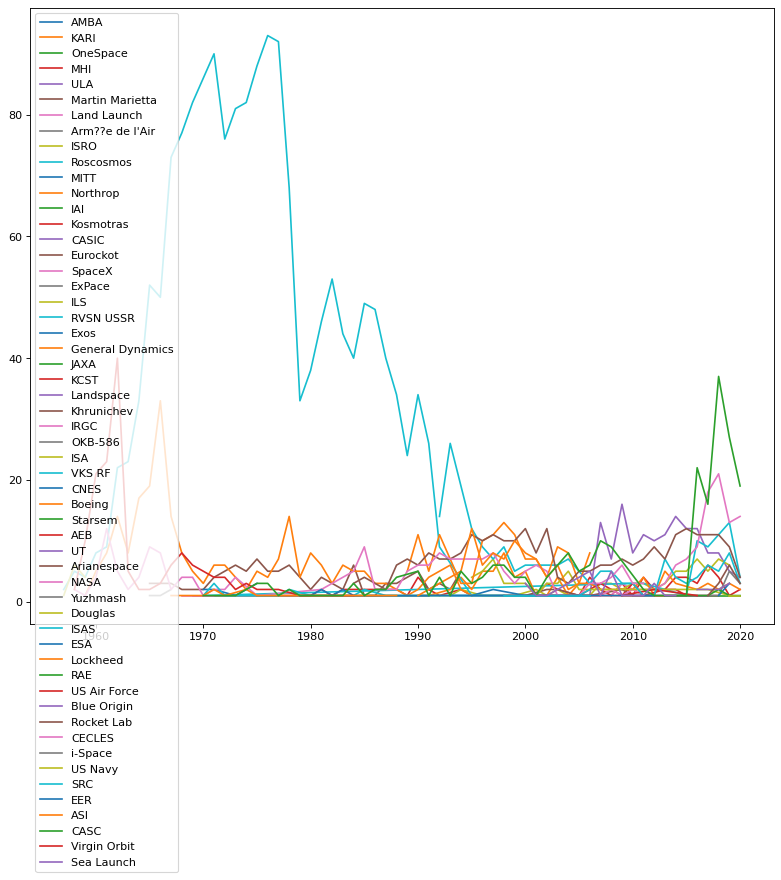

In [48]:
org_set = set(org_launches['Organisation'])

plt.figure(figsize=(12, 10), dpi=80)
for org in org_set:
     selected_data = org_launches.loc[org_launches['Organisation'] == org]
     plt.plot(selected_data['year'], selected_data['counts'], label=org)
   
plt.legend()
plt.show()